In [333]:
import os
import datetime
import numpy as np
import timeit

current_path = os.getcwd()
print("当前目录:",current_path)
os.chdir(r"C:\Users\a\Desktop\GUGW\12python\量化投资学习\Python进阶")
current_path = os.getcwd()
print("当前目录:",current_path)

当前目录: C:\Users\a\Desktop\GUGW\12python\量化投资学习\Python进阶
当前目录: C:\Users\a\Desktop\GUGW\12python\量化投资学习\Python进阶


In [3]:

#从文本文件中提取字段
#将字段信息添加到csv文件中
filename:str = "CTP_MD.log"
csvFilename:str = "md.csv"
tickTime=[]
tickTimeSec=[]
InstrId=[]
LastP=[]
LastV=[]
UTimeSec=[]
B1=[]
Bv1=[]
A1=[]
Av1=[]

csvFWrite = open(csvFilename,'w')
csvFWrite.write("InID,UTime,UMil,LastP,V,B1,BV1,A1,AV1\n")

print(datetime.datetime.now())
beginTime = datetime.datetime.now()
fileCount=0
with open(filename,'r') as fileRead:
    while True:
        line = fileRead.readline()
        if not line:
            break
        fileCount +=1;
        #print(line,end='')
        fields=line.split(" ")
        #print(fields)
        if len(fields)==3:
            if fields[2].find("B1")>-1:
                tick=(fields[2].split(","))
                tickFields={}
                for tickField in tick:
                    name,value = tickField.split("=")
                    tickFields[name]=value
                InstrId.append(tickFields["InID"])
                UTimeSec.append(tickFields["UTime"]+"."+tickFields["UMil"].zfill(3))
                LastP.append(float(tickFields["LastP"]))
                LastV.append(int(tickFields["V"]))
                B1.append(float(tickFields["B1"]))
                Bv1.append(int(tickFields["BV1"]))
                A1.append(float(tickFields["A1"]))
                Av1.append(int(tickFields["AV1"]))
                csvFWrite.write(tickFields["InID"]+","+tickFields["UTime"]+","+tickFields["UMil"]+","+tickFields["LastP"] + ","+ tickFields["V"] \
                                +"," + tickFields["B1"] +"," + tickFields["BV1"] + "," + tickFields["A1"] + "," + tickFields["AV1"] +"\n")
                               
csvFWrite.close()
print(datetime.datetime.now())
endTime = datetime.datetime.now()
print("处理耗时:",endTime-beginTime)
print("文件总行数 %d,大小 %f MB"%(fileCount,os.path.getsize(filename)/1024/1024)) 

2021-07-07 09:07:47.053473
2021-07-07 09:07:56.319860
处理耗时: 0:00:09.266387
文件总行数 368874,大小 131.795976 MB


In [4]:
import pandas as pd
data = pd.DataFrame({"Instr":InstrId,"Time":UTimeSec,"Last":LastP,"Bid":B1,"Ask":A1})
#data=data.drop('Last',axis='columns')
columnsOrder=["Instr","Time","Last","Bid","Ask"]
#排序,修改的是副本，因此要赋值给data，才能修改原始内存中的对象
data=data[columnsOrder] 

In [5]:
data.replace(6198,0)  #批量替换值,直接修改内存中，而不是副本
#获取列名
cols=list(data)
#cols.insert(0,cols.pop(cols.index('Bid')))
cols

['Instr', 'Time', 'Last', 'Bid', 'Ask']

In [6]:
#副本操作，都要使用赋值
#data = data.loc[:,[ 'Instr', 'Time', 'Last', 'Ask','Bid']]
# loc获取行 列 
data = data.loc[:,cols]
data
#重命名列
data=data.rename(columns={"Instr":"合约名"})
data

,合约名,Time,Last,Bid,Ask
0,ag2103,02:29:58.500,6177.00,5999.00,6198.00
1,au2012,02:30:00.000,441.46,441.46,441.48
2,au2102,02:30:00.000,442.90,442.98,443.72
3,au2102,02:30:00.000,442.90,442.98,443.72
4,au2104,02:29:58.500,444.70,442.60,445.28
5,au2104,02:29:58.500,444.70,442.60,445.28
6,hc2103,22:59:59.000,3681.00,3664.00,3698.00
7,hc2103,22:59:59.000,3681.00,3664.00,3698.00
8,hc2104,22:59:52.000,3650.00,3651.00,3660.00
9,hc2104,22:59:52.000,3650.00,3651.00,3660.00


In [7]:
#获取所有行 所有列
data.loc[:,:]
#获取Bid和Ask
data.loc[:,["Bid","Ask"]]
#iloc = intergate location
data.iloc[:,[0,4]]
#除了以上获取列列方式，还有如下更快捷的方式
data["Bid"]
data.Bid
#列计算
data["Bid"]=data.Bid+1

#行筛选
data[data.合约名 == "ag2103"]
data[(data.合约名 == "ag2103") | (data.合约名 == "ag2102")]



,合约名,Time,Last,Bid,Ask
0,ag2103,02:29:58.500,6177.0,6000.0,6198.0
44,ag2102,09:00:00.500,6162.0,6148.0,6165.0
45,ag2103,09:00:00.500,6177.0,6103.0,6198.0
63,ag2102,09:00:01.000,6162.0,6149.0,6159.0
64,ag2103,09:00:01.000,6177.0,6126.0,6197.0
93,ag2102,09:00:01.500,6162.0,6154.0,6158.0
94,ag2103,09:00:01.500,6177.0,6165.0,6169.0
118,ag2102,09:00:02.000,6142.0,6135.0,6156.0
119,ag2103,09:00:02.000,6161.0,6127.0,6167.0
139,ag2102,09:00:02.500,6120.0,6119.0,6120.0


In [17]:
if 'Mid' in list(data):
    data["Mid"]=(data.Bid+data.Ask)/2
else:
    data["ddd"]=(data.Bid+data.Ask)/2
    data = data.rename(columns={"ddd":"Mid"})

data.head()


,合约名,Time,Last,Bid,Ask,Mid
0,ag2103,02:29:58.500,6177.00,6000.00,6198.00,6099.00
1,au2012,02:30:00.000,441.46,442.46,441.48,441.97
2,au2102,02:30:00.000,442.90,443.98,443.72,443.85
3,au2102,02:30:00.000,442.90,443.98,443.72,443.85
4,au2104,02:29:58.500,444.70,443.60,445.28,444.44


In [29]:
data.head()
#统计合约行情数量
#分组功能

ticksByInstru=data[["合约名","Bid"]].groupby("合约名").count().sort_values('Bid',ascending=False)
#ticksByInstru=data.groupby("合约名").count().sort_values('Bid',ascending=False)
ticksByInstru = ticksByInstru.rename(columns={"Bid":"Ticks"})
ticksByInstru.head()

data[["合约名","Bid"]].groupby("合约名").first()
data[["合约名","Bid"]].groupby("合约名").last()
data[["合约名","Bid"]].groupby("合约名").max()
#data[["合约名","Bid"]].groupby("合约名").describe()


,Bid
合约名,
ag2012,6173.00
ag2101,6188.00
ag2102,6195.00
ag2103,6203.00
au2012,446.12
au2102,448.04
au2104,449.88
hc2103,3700.00
hc2104,3669.00


In [113]:
data_df=data[["合约名","Bid"]].groupby("合约名").mean().head(10)
# 行索引进行分组，对于多层行索引时候有用，0，表示第一层索引，[0,1,2] 表示按照1、2、3级索引进行
#data_df.groupby(level=[0]).mean()

In [13]:
#统计一天价格平均值
avgByInstru = data[["合约名","Last"]].groupby("合约名").mean().sort_values('Last',ascending=False)
avgByInstru = avgByInstru.rename(columns={"Last":"mean"})
avgByInstru.head()



,mean
合约名,
sn2012,146286.281020
sn2011,146159.726362
sn2010,145893.576642
ss2010,14383.330401
ss2011,14312.640773


In [14]:
#统计一天价格最大值
maxByInstru = data[["合约名","Last"]].groupby("合约名").max().sort_values('Last',ascending=False)
maxByInstru = maxByInstru.rename(columns={"Last":"max"})
maxByInstru.head()



,max
合约名,
sn2012,146890.0
sn2011,146690.0
sn2010,146520.0
ss2010,14500.0
ss2011,14400.0


In [15]:
#统计一天价格平均值
minByInstru = data[["合约名","Last"]].groupby("合约名").min().sort_values('Last',ascending=False)
minByInstru = minByInstru.rename(columns={"Last":"min"})
minByInstru.head()

,min
合约名,
sn2012,145830.0
sn2011,145520.0
sn2010,145240.0
ss2010,14280.0
ss2011,14210.0


In [16]:
#自定义函数聚合
def t_range(arr):
    return arr.max()-arr.min()

def t2_range(arr):
    return arr.index[0]-arr.min()

def t3_range(arr):
    return arr.max() - arr.index[0]

minByInstru = data[["合约名","Last"]].groupby("合约名").agg(t_range).head()
minByInstru = minByInstru.rename(columns={"Last":"selfDefine"})
minByInstru.head()

#data[["合约名","Last"]].groupby("合约名").agg(t2_range).head()

,selfDefine
合约名,
ag2012,157.0
ag2101,160.0
ag2102,158.0
ag2103,151.0
au2012,6.0


In [52]:
#单列 多个聚合函数， agg方式
minByInstru = data[["合约名","Last"]].groupby("合约名").agg(['sum','max','min',t_range]).head()
minByInstru

#下面是分步骤的方式
#分组行程子dataframe
groupd=data.groupby(["合约名"])
#从子dataframe中获取某列在·
groupd_heyueming = groupd['Bid']
#对某列进行多个聚合函数
groupd_heyueming.agg(['mean','max','min','count']).head()

fnames = [('平均数','mean'),('最大值','max'),('最小值','min'),('总数','count')]
result_fnames=groupd_heyueming.agg(fnames).head()


In [57]:
#多列 多个聚合函数
#分组行程子dataframe
groupd=data.groupby(["合约名"])
#从子dataframe中获取某列在·
groupd_heyueming = groupd['Bid','Ask']
#对某列进行多个聚合函数
groupd_heyueming.agg(['mean','max','min','count']).head()
#这个结果会生成Bid和Ask两列的数据，每列下面又又四列 mean、max、min、count
groupd_heyueming_agg=groupd_heyueming.agg(['mean','max','min','count'])
#获取Bid列下的数据
#groupd_heyueming_agg['Bid'].head()
groupd_heyueming_agg.head()
#获取索引的长度，即合约名列表的长度
#groupd_heyueming_agg['Bid'].index.size



Bid                                  Ask                   \
               mean      max     min  count         mean      max     min   
合约名                                                                         
ag2012  6103.788087  6173.00  6016.0  26794  5610.599276  6172.00    0.00   
ag2101  6113.214196  6188.00  6025.0  21611  5995.776271  6187.00    0.00   
ag2102  6120.993860  6195.00  6036.0  18567  6067.451985  6194.00    0.00   
ag2103  6132.003872  6203.00  6000.0  14721  6105.042524  6202.00    0.00   
au2012   442.810768   446.12   440.1  23813   441.845101   445.16  439.12   

               
        count  
合约名            
ag2012  26794  
ag2101  21611  
ag2102  18567  
ag2103  14721  
au2012  23813

In [116]:
#度列，不同列不同聚合函数
data[["合约名","Bid","Ask"]].groupby("合约名").agg({'Bid':['mean','max','min'],'Ask':['count']}).head()
data[["合约名","Bid","Ask"]].groupby("合约名").agg({'Bid':[np.mean,np.max,np.min],'Ask':['count']}).head()

Bid                     Ask
               mean     amax    amin  count
合约名                                        
ag2012  6103.788087  6173.00  6016.0  26794
ag2101  6113.214196  6188.00  6025.0  21611
ag2102  6120.993860  6195.00  6036.0  18567
ag2103  6132.003872  6203.00  6000.0  14721
au2012   442.810768   446.12   440.1  23813

In [58]:
#将原先分组索引作为单独一列，此时最左边的数字才是索引
data[["合约名","Bid","Ask"]].groupby("合约名",as_index=False).agg({'Bid':['mean','max','min'],'Ask':['count']}).head()

合约名          Bid                     Ask
                  mean      max     min  count
0  ag2012  6103.788087  6173.00  6016.0  26794
1  ag2101  6113.214196  6188.00  6025.0  21611
2  ag2102  6120.993860  6195.00  6036.0  18567
3  ag2103  6132.003872  6203.00  6000.0  14721
4  au2012   442.810768   446.12   440.1  23813

In [69]:
#显示每组的前三行记录
datasort=data.groupby("合约名",as_index= False).apply(lambda x:x[:3]).head()
datasort


合约名          Time    Last     Bid     Ask     Mid
0 42  ag2012  09:00:00.500  6135.0  6130.0  6130.0  6130.0
  61  ag2012  09:00:01.000  6131.0  6132.0  6133.0  6132.5
  91  ag2012  09:00:01.500  6131.0  6130.0  6131.0  6130.5
1 43  ag2101  09:00:00.500  6115.0  6116.0  6160.0  6138.0
  62  ag2101  09:00:01.000  6137.0  6139.0  6144.0  6141.5

In [132]:
#显示每组的前1到3行记录，不包含第三行。
data11=data.groupby("合约名")
data11.apply(lambda x:x[1:3]).head()

合约名          Time    Last     Bid     Ask     Mid
合约名                                                            
ag2012 61  ag2012  09:00:01.000  6131.0  6132.0  6133.0  6132.5
       91  ag2012  09:00:01.500  6131.0  6130.0  6131.0  6130.5
ag2101 62  ag2101  09:00:01.000  6137.0  6139.0  6144.0  6141.5
       92  ag2101  09:00:01.500  6138.0  6139.0  6150.0  6144.5
ag2102 63  ag2102  09:00:01.000  6162.0  6149.0  6159.0  6154.0

In [150]:
#显示每组根据Bid排序的top10记录，
#方法1：先分组
data.groupby("合约名").apply(lambda x : x.sort_values(['Bid'],ascending=True)[0:10]).head()
#方法2：先排序
data.sort_values(['Bid'],ascending=True).groupby("合约名").head(10)

,合约名,Time,Last,Bid,Ask,Mid
336903,sc2010,14:40:08.000,289.4,290.3,289.4,289.85
336923,sc2010,14:40:08.500,289.4,290.3,289.5,289.90
336944,sc2010,14:40:09.000,289.4,290.3,289.5,289.90
340114,sc2010,14:41:54.500,289.5,290.4,289.5,289.95
337247,sc2010,14:40:17.500,289.5,290.4,289.6,290.00
337264,sc2010,14:40:18.000,289.5,290.4,289.6,290.00
337278,sc2010,14:40:18.500,289.5,290.4,289.6,290.00
337149,sc2010,14:40:14.500,289.5,290.4,289.5,289.95
337118,sc2010,14:40:13.500,289.4,290.4,289.5,289.95
337061,sc2010,14:40:12.000,289.4,290.4,289.5,289.95


In [122]:
import numpy as np
df=pd.DataFrame(np.random.randn(4,5),columns=list('abcde'))
df


,a,b,c,d,e
0,-1.323073,1.600780,2.347642,-0.714366,1.443399
1,0.520556,0.349437,-1.913277,-0.938181,-0.124033
2,0.637957,-0.835005,0.651701,0.229094,-1.045315
3,1.883771,-0.849862,1.551563,-0.132248,0.911246


In [127]:
# 求每列的最大值与最小值的差，即每列的所有行，不同函数中的axis虽然都是0表示行，1表示列，但是对应行为有点不一样理解，具体问题具体分析
a = df.apply(lambda x:x.max()-x.min())
# 求每行的最大值与最小值的差，即每行的所有列
b = df.apply(lambda x:x.max()-x.min(), axis=1)
print(a,b)
c = df.apply(lambda x: print(x['a']+x['b']),axis=1)
c

a    3.206844
b    2.450642
c    4.260920
d    1.167276
e    2.488714
dtype: float64 0    3.670715
1    2.433834
2    1.697016
3    2.733633
dtype: float64
0.2777073034613067
0.8699929191487659
-0.19704846991766511
1.0339088593002466


0    None
1    None
2    None
3    None
dtype: object

In [80]:
"03".zfill(3)  #字符串补齐，经常会用到的

'003'

In [88]:
import time

a1 = "2020-10-24 23:40:00.001"

timeArray = time.strptime(a1, "%Y-%m-%d %H:%M:%S.%f")
timeArray



time.struct_time(tm_year=2019, tm_mon=5, tm_mday=10, tm_hour=23, tm_min=40, tm_sec=0, tm_wday=4, tm_yday=130, tm_isdst=-1)

In [100]:
#字符串转换为时间datetime
import datetime
datetime2 = datetime.datetime.strptime(a1, "%Y-%m-%d %H:%M:%S.%f")

time_str = '13:55:26.011'
time_object = datetime.datetime.strptime(time_str, '%H:%M:%S.%f').time()
time_object


datetime.time(13, 55, 26, 11000)

In [107]:
#时间转换为字符串
dateTime_p = datetime.datetime.now()
str_p = datetime.datetime.strftime(dateTime_p,'%Y-%m-%d %H:%M:%S.%f')
str_p

'2020-10-24 14:56:44.972384'

In [169]:
#减去天数
yesterday =datetime.datetime.now() + datetime.timedelta(days=-1)
yesterday
datetime.datetime.strftime(yesterday,'%Y-%m-%d %H:%M:%S.%f')

'2020-10-23 15:09:39.785859'

In [172]:
deltaOneMicro=datetime.timedelta(microseconds=100)
yesterday = yesterday+ 60*1000*10*deltaOneMicro
datetime.datetime.strftime(yesterday,'%Y-%m-%d %H:%M:%S.%f')


'2020-10-23 15:12:39.785859'

In [342]:

timeSpan = yesterday - datetime.datetime.now()
#day=  -1表示最近24小时以内
print(timeSpan.days," ",timeSpan.seconds,"",timeSpan.total_seconds())



-2   86318  -86481.007939


In [121]:
def Vlookup():
    matrix1 = [["学号","姓名","班级"],[1,"张三","一班"],[2,"李四","二班"]]
    matrix2 = [["学号","分数","排名"],[1,99,1],[2,98,2]]
    #删除第0行的记录,该行应该作为列头而不是行记录
    matrix1=np.delete(matrix1,0,axis=0)
    #删除第0行的记录
    matrix2=np.delete(matrix2,0,axis=0)
    
    df1=pd.DataFrame(matrix1)
    df1.columns=["学号","姓名","班级"]
    print(df1)
    
    df2=pd.DataFrame(matrix2)
    df2.columns=["学号","分数","排名"]
    print(df2)
    
    result = pd.merge(df1,df2.loc[:,['学号','分数','排名']],how='left',on='学号')
    print(result)
    
Vlookup()

  学号  姓名  班级
0  1  张三  一班
1  2  李四  二班
  学号  分数 排名
0  1  99  1
1  2  98  2
  学号  姓名  班级  分数 排名
0  1  张三  一班  99  1
1  2  李四  二班  98  2


In [354]:
#指定索引，若不指定则从0开始，此处索引为string
df3 = pd.DataFrame([[1,2,3]]*10,index=['1','2','3','4','5','6','7','8','9','10'])
df3.columns=['A','B','C']
df3

,A,B,C
1,1,2,3
2,1,2,3
3,1,2,3
4,1,2,3
5,1,2,3
6,1,2,3
7,1,2,3
8,1,2,3
9,1,2,3
10,1,2,3


In [353]:
#以A列作为索引，A列不删除
#df3.set_index('A', inplace=True, drop=False)
#df3.set_index('A', inplace=True, drop=True)
#df3

,A,B,C
A,,,
1,1,3,3
1,1,3,3
1,1,3,3
1,1,3,3
1,1,3,3
1,1,3,3
1,1,3,3
1,1,3,3
1,1,3,3


In [351]:

print("行记录数:",df.size)
#各列记录数
df3.count()
df3.head()

行记录数: 20


,A,B,C
0,1,2,3
1,1,2,3
2,1,2,3
3,1,2,3
4,1,2,3


In [352]:
#对整个dataframe使用qpply，
#axis = 0， x为每一列的Series，即每一列的所有行
#axis = 1, x 为每一行的Series，即每一行的所有列
#将第2列上的值进行变化
def appFunAdd(x):
    
    if x[1] > 2:
        x[1] = '2'
    else:
        x[1] = '3'
    return x


#会直接修改值
df3.apply(appFunAdd,axis=1)

df3.head(10)



,A,B,C
0,1,3,3
1,1,3,3
2,1,3,3
3,1,3,3
4,1,3,3
5,1,3,3
6,1,3,3
7,1,3,3
8,1,3,3
9,1,3,3


In [355]:
#对每一列中的值进行循环遍历操作
#修改所有1的值为100
def changeDefault(y):
    print('xxx')
    for i in range(y.count()):
        if y[i] == 1:
            y[i] = 100
    return y

df3.apply(changeDefault,axis=0)


xxx
xxx
xxx
xxx


,A,B,C
1,100,2,3
2,100,2,3
3,100,2,3
4,100,2,3
5,100,2,3
6,100,2,3
7,100,2,3
8,100,2,3
9,100,2,3
10,100,2,3


In [274]:
#对某列使用apply，是作用在副本上。
#将某列上的所有值逐个遍历进行递增处理
seq=10
def appFunSeq(x):
    global seq
    x = seq
    seq = seq + 1
    return x

#修改的是副本
df3["A"] = df3["A"].apply(appFunSeq)

In [329]:
df3

,A,B,C
1,100,100,100
2,2,2,2
3,3,3,3
4,4,4,4
5,5,5,5
6,6,6,6
7,7,7,7
8,8,8,8
9,9,9,9
10,10,10,10


In [367]:
print(df3.index)
print("索引是否递增:",df3.index.is_monotonic_increasing)
print("索引是否唯一：",df3.index.is_unique)
df3.sort_index()
print("索引是否递增:",df3.index.is_monotonic_increasing)
print("索引是否唯一：",df3.index.is_unique)
#因为索引是字符串，所以需要用如下数组形式
print(df3.loc[['2','3'],:])
print(df3.loc[['2','4'],['B','C']])

#利用数字,第1行，第1、2列显示.  以0为开始。
print(df3.iloc[1:2,1:3])

def test():
    print("")
#测试方法耗时
print(timeit.timeit(stmt=test, number=1))

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')
索引是否递增: False
索引是否唯一： True
索引是否递增: False
索引是否唯一： True
     A  B  C
2  100  2  3
3  100  2  3
   B  C
2  2  3
4  2  3
   B  C
2  2  3

2.069999993636884e-05


In [368]:
#去重
df3.drop_duplicates(subset=['B'],keep='last')

,A,B,C
10,100,2,3


In [371]:
# numpy 和 matplotlib画图，画表
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

data = [1,2,3,4]
arr = np.array(data)
print(arr)

data1 = [data,data]
arr1 = np.array(data1)
print(arr1)

arr2 = np.zeros((3,3))
print(arr2)

arr3 = np.arange(1,10,2)
print(arr3)

print(arr3.dtype)

arr4 = arr1.astype(np.str)
print(arr4.dtype)
print(arr4)

print(arr.std())
print(arr.sum())
print(arr.mean())
print(arr.max())

def f(x):
    return x+x

print(f(arr))

print(npr.rand(3,2))

print(npr.randn(100))

print(npr.randint(1,10,3))

print(npr.choice(arr,3))


[1 2 3 4]
[[1 2 3 4]
 [1 2 3 4]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[1 3 5 7 9]
int32
<U11
[['1' '2' '3' '4']
 ['1' '2' '3' '4']]
1.118033988749895
10
2.5
4
[2 4 6 8]
[[0.66468923 0.3675908 ]
 [0.10839745 0.11588494]
 [0.94452465 0.63415242]]
[-1.47616606e+00 -1.14417545e+00 -2.25112650e-01 -9.46309457e-01
 -2.94409073e-01  2.20980506e-01 -8.49218152e-01  3.28930674e-01
  3.36314078e-01  1.78058579e+00  2.40974905e+00 -7.95584146e-02
 -5.96599479e-01 -7.23829839e-01  1.52413663e+00  7.49973919e-01
  1.26972046e+00 -1.85625233e+00  9.62642504e-01  1.39093321e+00
 -3.30520060e-01  1.71852702e+00 -1.93739060e-01 -6.76451248e-01
 -8.64570050e-04  6.85281207e-01 -2.48099539e-01  2.72351855e+00
 -1.04055771e+00 -9.57276237e-01 -9.61282599e-01 -5.10067171e-01
  2.03305874e+00 -1.18548227e+00  2.09298320e+00 -2.71913775e-01
 -1.04490548e-01  8.55742682e-01 -2.15650082e+00 -1.71196934e-01
  1.27196874e-01  6.90744697e-02 -6.82215657e-01  5.08712266e-01
 -1.11439506e+00  1.12165176e+00  6.4858

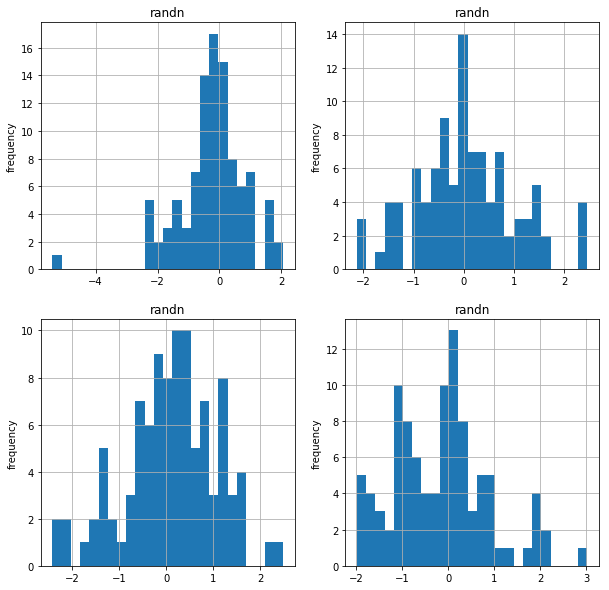

In [370]:

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
ax1.hist(npr.randn(100),bins=25,stacked=True)
ax1.set_title('randn')
ax1.set_ylabel('frequency')
ax1.grid(True)

ax2.hist(npr.randn(100),bins=25,stacked=True)
ax2.set_title('randn')
ax2.set_ylabel('frequency')
ax2.grid(True)

ax3.hist(npr.randn(100),bins=25,stacked=True)
ax3.set_title('randn')
ax3.set_ylabel('frequency')
ax3.grid(True)

ax4.hist(npr.randn(100),bins=25,stacked=True)
ax4.set_title('randn')
ax4.set_ylabel('frequency')
ax4.grid(True)
